In [106]:
import numpy as np
import matplotlib.pyplot as plt

# Problem 1

Solving $ y'' + 4y' + 2y = 0 $ over the range $x\in[0,5]$ with initial conditions $y(0) = 2$ and $y'(0) = 0$. We start by rewriting this as a system of two first order differential equations, letting $y(x)$ be itself and $y'(x) = z(x)$. Then:
\begin{align*}
    \begin{bmatrix}
        y'(x) \\ z'(x)
    \end{bmatrix}
    =
    \begin{bmatrix}
        z(x) \\ -4z(x) - 2y(x)
    \end{bmatrix}
\end{align*}
with $y(0) = 2$ and $z(0)=0$. So now we have a vector valued function, call it $\vec{F}(x) = \begin{bmatrix} y \\ z \end{bmatrix}$, that we can solve with typical forward Euler, as given below:
$$ \vec{F}_{i+1} = \vec{F}_i + h\vec{F}'(x_i, \vec{F}_i) $$

In [107]:
def F_prime(F):
    y = F[0]
    z = F[1]

    return np.array([z, -4*z - 2*y])

def euler(x_init, x_final, F_prime, F_init, h):
    F_i = F_init
    x_i = x_init

    y_arr = [F_i[0]]
    
    while x_i < x_final:
        F_i = F_i + h*F_prime(F_i)
        y_arr.append(F_i[0])

        x_i += h

    return np.array(y_arr)


In [108]:
F_init = np.array([2,0])

y_for_deci_h =  euler(0, 5, F_prime, F_init, 0.1)
y_for_centi_h = euler(0, 5, F_prime, F_init, 0.01)
y_for_milli_h = euler(0, 5, F_prime, F_init, 0.001)

y = lambda x : 2*np.exp(-x) * (np.cos(np.sqrt(3) * x) + np.sin(np.sqrt(3) * x) / np.sqrt(3) )

In [109]:
x_range = np.linspace(0,5,501)
y_true = y(x_range)

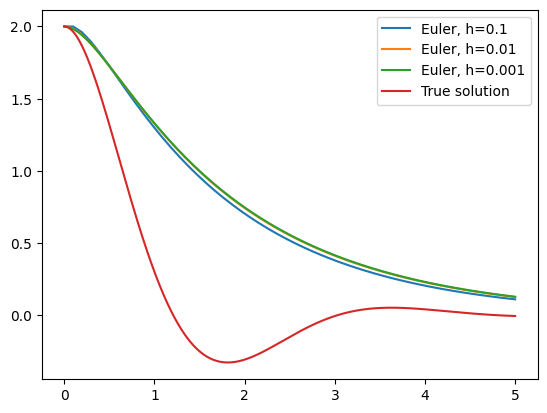

In [110]:
plt.plot(np.linspace(0,5, len(y_for_deci_h)), y_for_deci_h, label='Euler, h=0.1')
plt.plot(np.linspace(0,5, len(y_for_centi_h)), y_for_centi_h, label='Euler, h=0.01')
plt.plot(np.linspace(0,5, len(y_for_milli_h)), y_for_milli_h, label='Euler, h=0.001')
plt.plot(x_range, y_true, label='True solution')
plt.legend()
plt.show()

# Problem 2

Again we have a second order ODE:
$$ y'' = (1+x^2)y $$
so as we did before, we let $y'(x) = z(x)$ and write this as a system of first order ODEs:
\begin{align*}
    \begin{bmatrix}
        y'(x) \\ z'(x)
    \end{bmatrix}
    =
    \begin{bmatrix}
        z(x) \\ (1+x^2)y(x)
    \end{bmatrix}
\end{align*}
With initial condition:
\begin{align*}
    \begin{bmatrix}
        y'(0) \\ z'(0)
    \end{bmatrix}
    =
    \begin{bmatrix}
        1 \\ 0
    \end{bmatrix}
\end{align*}

In [ ]:
def rk4(f, a, b, h, yinit):
    xs = np.arange(a, b + h, h)
    ys = np.zeros((len(xs), len(yinit)))
    y = np.array(yinit, dtype=float)

    for j, x in enumerate(xs):
        ys[j] = y
        if x + h > b:
            break
        k0 = h * f(x, y)
        k1 = h * f(x + h/2, y + k0/2)
        k2 = h * f(x + h/2, y + k1/2)
        k3 = h * f(x + h,   y + k2)
        y = y + (k0 + 2*k1 + 2*k2 + k3)/6

    return xs, ys

def F(x, y_vec):
y, z = y_vec
return np.array([z, (1+x**2)*y])

xs, ys = rk4(F, 0, 1, 0.1, [1, 0])  
y = ys[:, 0]


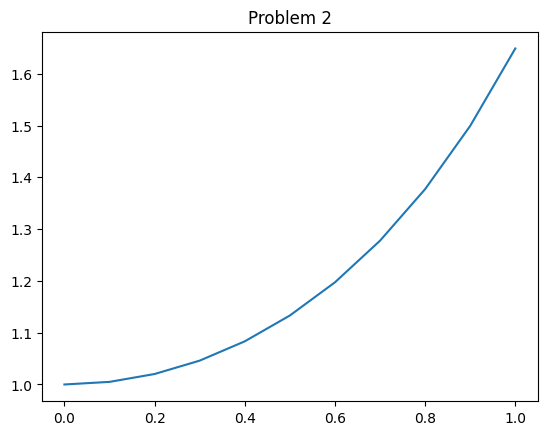

In [113]:
plt.plot(xs,y)
plt.title("Problem 2")
plt.show()

# Problem 3.

This figure shows various solution methods to the following ODE:
$$ y' = -\frac{30}{1-x^2} + \frac{2x}{1-x^2} y - y^2$$
with initial condition $y(0.05) = 19.53$.

The plot goes from 0 to 0.5.

In [114]:
def y_prime(x, y):
    return (2*x*y-30)/(1-x**2) - y**2

In [115]:
def explicit_midpt(f, a, b, h, yinit):
    xs = np.arange(a, b + h, h)
    ys = np.zeros(len(xs))
    y  = float(yinit)

    for j, x in enumerate(xs):
        ys[j] = y
        if x + h > b:
            break

        k0 = h * f(x, y)
        y = y + h * f(x + h/2, y + k0/2)

    return xs, ys


In [116]:
def euler2(f, a, b, h, yinit):
    xs = np.arange(a, b + h, h)
    ys = np.zeros(len(xs))
    y  = float(yinit)

    for j, x in enumerate(xs):
        ys[j] = y
        if x + h > b:
            break
        y = y + h * f(x, y)

    return xs, ys


In [117]:
xs_euler, ys_euler = euler2(y_prime,a=0.05, b=0.5, h=0.01, yinit=19.43)
xs_rk4, ys_rk4 = rk4(y_prime,a=0.05, b=0.5, h=0.01, yinit=[19.43])
xs_midpt, ys_midpt = explicit_midpt(y_prime,a=0.05, b=0.5, h=0.01, yinit=19.43)

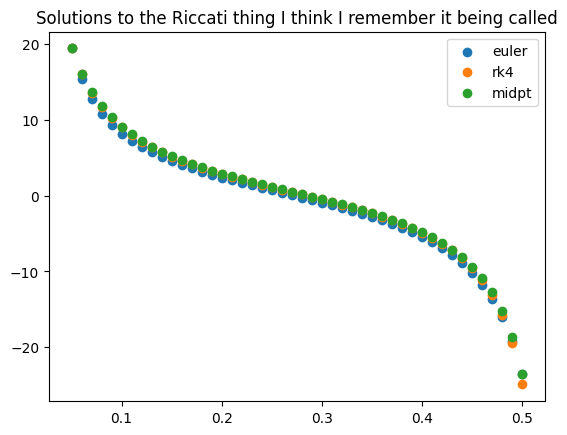

In [118]:
plt.scatter(xs_euler, ys_euler, label="euler")
plt.scatter(xs_rk4, ys_rk4, label="rk4")
plt.scatter(xs_midpt, ys_midpt, label="midpt")
plt.title("Solutions to the Riccati thing I think I remember it being called")
plt.legend()
plt.show()

# Problem 4

Solving:
\begin{align*}
 y'' + y' + y = 3
\end{align*}

with $y(0) = 1$ and $y'(0) = 0$.

System is:
\begin{align*}
    \begin{bmatrix}
        y'(x) \\ z'(x)
    \end{bmatrix}
    =
    \begin{bmatrix}
        z(x) \\ 3 -z(x) - y(x) 
    \end{bmatrix}
\end{align*}


In [119]:
def F_prime(x, F):
    y, z = F
    return np.array([z, 3-z-y])

In [120]:
xs, ys = rk4(F_prime,a=0, b=1, h=0.01, yinit=np.array([1,0]))

In [121]:
ys.shape

(101, 2)

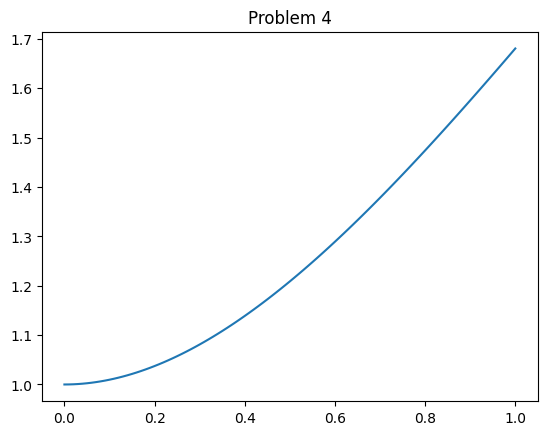

In [122]:
plt.plot(xs,ys.T[0])
plt.title("Problem 4")
plt.show()

# Problem 5

BVP to solve:
\begin{align*}
    y'' = \frac{1}{8}\left(32 + 2x^3 - 4y'\right)
\end{align*}

over $x\in[1,3]$ with $y(1) = 17$ and $y(3) = 43/3$.

BVPs need new methods, so I'll implement shooting method.

In [ ]:
import numpy as np

def rk4_system(f, x0, y0_vec, h, x_f):
    xs = [x0]
    ys = [np.array(y0_vec, dtype=float)]
    x = x0
    y = np.array(y0_vec, dtype=float)
    
    while x < x_f - 1e-12:
        if x + h > x_f:  # last small step
            h = x_f - x
        k1 = np.array(f(x, y))
        k2 = np.array(f(x + h/2, y + h*k1/2))
        k3 = np.array(f(x + h/2, y + h*k2/2))
        k4 = np.array(f(x + h, y + h*k3))

        y = y + (h/6)*(k1 + 2*k2 + 2*k3 + k4)
        x = x + h
        xs.append(x)
        ys.append(y.copy())
    
    return np.array(xs), np.array(ys)


def shoot(f, x0, y0, x1, y1_target, slope_guess1, slope_guess2, h=0.01, tol=1e-6):
    xs1, ys1 = rk4_system(f, x0, [y0, slope_guess1], h, x1)
    F1 = ys1[-1,0] - y1_target   # mismatch at x1

    xs2, ys2 = rk4_system(f, x0, [y0, slope_guess2], h, x1)
    F2 = ys2[-1,0] - y1_target

    for _ in range(20):
        slope_new = slope_guess2 - F2*(slope_guess2 - slope_guess1)/(F2 - F1)

        xs, ys = rk4_system(f, x0, [y0, slope_new], h, x1)
        F_new = ys[-1,0] - y1_target
        
        if abs(F_new) < tol:
            return xs, ys, slope_new
        
        slope_guess1, F1 = slope_guess2, F2
        slope_guess2, F2 = slope_new, F_new

    raise RuntimeError("Shooting method did not converge.")


def f(x, Y):
    y, yp = Y
    ypp = (32 + 2*x**3 - 4*yp)/8
    return [yp, ypp]


x0, y0 = 1, 17
x1, y1 = 3, 43/3

guess1 = 0
guess2 = 10

xs, ys, slope = shoot(f, x0, y0, x1, y1, guess1, guess2)

In [124]:
print(xs.shape)
print(ys[0].shape)

(201,)
(2,)


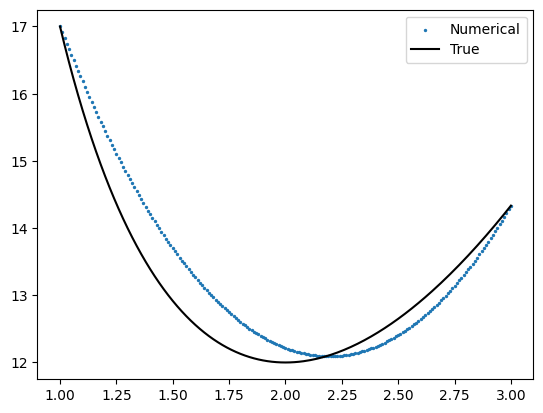

In [136]:
plt.scatter(xs, ys.T[0], s=2, label="Numerical")
plt.plot(xs, xs**2 + 16/xs, color="black", label="True")
plt.legend()
plt.show()


# Problem 6

This problem feels very complicated and I don't want to use DIY algorithms for it so I'll use the standard scipy ones. Oh well.

We'll need to turn this 4th order ODE to a system of 4 first orders for $w = y_0$, $w' = y_1$, and so on:
\begin{align*}
    \begin{pmatrix}
        w' \\ w'' \\ w''' \\ w'''' 
    \end{pmatrix}
    =
    \begin{pmatrix}
        y_1 \\ y_2 \\ y_3 \\ 13y_2 - 36y_0 
    \end{pmatrix}
\end{align*}

We then need to implement a shooting method to figure out what our other two initial conditions need to be, based
on the boundary conditions.

In [143]:
from scipy.integrate import solve_ivp
from scipy.optimize import fsolve

def ode_system(x, y):
    return [
        y[1],
        y[2],
        y[3],
        13 * y[2] - 36 * y[0]
    ]

def shoot(guesses):
    s2 = guesses[0]
    s3 = guesses[1]
    
    y0 = [0, -3, s2, s3]
    
    sol = solve_ivp(
        fun=ode_system, 
        t_span=(0, np.pi), 
        y0=y0, 
        t_eval=[np.pi]
    )
    
    w_at_pi = sol.y[0, -1]
    wp_at_pi = sol.y[1, -1]
    
    error1 = w_at_pi - 2
    error2 = wp_at_pi + 9
    
    return [error1, error2]

initial_guesses = [0.0, 0.0]

s_roots = fsolve(func=shoot, x0=initial_guesses)
    
s2_final = s_roots[0]
s3_final = s_roots[1]
    
final_y0 = [0, -3, s2_final, s3_final]

x_range = np.linspace(0, np.pi, 100)
final_sol = solve_ivp(
    fun=ode_system, 
    t_span=(0, np.pi), 
    y0=final_y0, 
    t_eval=x_range
)

w_x = final_sol.y[0, :]

w_pi_check = final_sol.y[0, -1]
wp_pi_check = final_sol.y[1, -1]

w = final_sol.y[0]

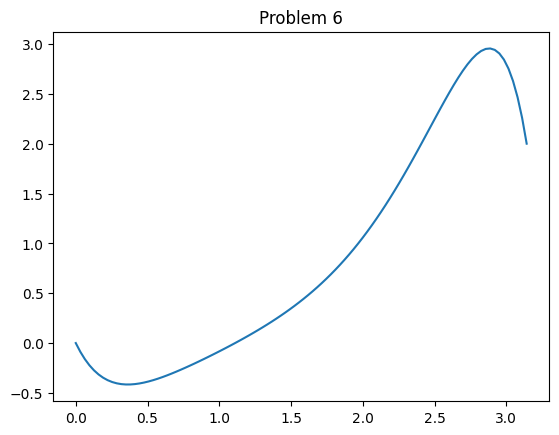

In [142]:
plt.plot(np.linspace(0,np.pi, len(w)), w)
plt.title("Problem 6")
plt.show()

i didn't like problem 6 very much that took a while

# Problem 7.

Here's the equation:
$$ y'' + \frac{1}{4}y = 8$$

And we'll use the finite difference expressions from class, namely:
$$ y'' \approx \frac{y_{i-1} - 2y_i + y_{i+1}}{h^2} $$

So substituting into our ODE:
\begin{align*}
    \frac{y_{i-1} - 2y_i + y_{i+1}}{h^2} + \frac{1}{4}y_i &= 8  \\
    y_{i-1} + \left(\frac{h^2}{4} - 2\right)y_i + y_{i+1} &= 8h^2
\end{align*}

Then we just need to make sure that the first and last $y_i$ are 0, to match the boundary conditions.

So we just need to construct our matrices and vectors and such, solving the system the same way we would any linear system.

In [169]:
n = 50
h = (10 - 0) / n

A = np.zeros((n+1, n+1))
A[0,0] = 1
A[n,n] = 1
for i in range(1, n):
    A[i, i-1] = 1
    A[i,i] = h**2 / 4 - 2
    A[i, i+1] = 1

b = np.ones(n+1) * 8 * h**2
b[0] = b[-1] = 0

In [170]:
y = np.linalg.solve(A,b)
x = np.linspace(0, 10, len(b))

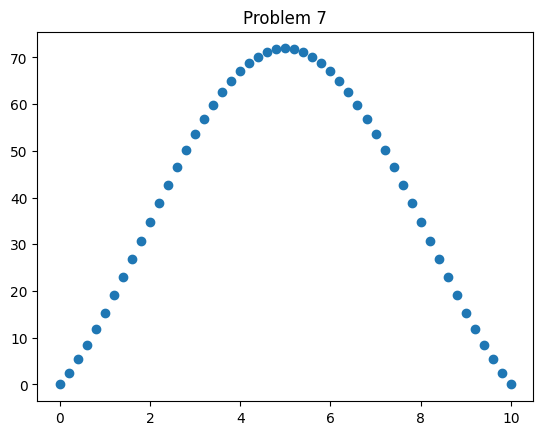

In [172]:
plt.scatter(x,y)
plt.title("Problem 7")
plt.show()

# Problem 8

Second order ODEs here, so I'll use the RK4 for those guys. We just need to set em up. Falling under gravity means for no air resistance:
\begin{align*}
    \sum F = mg &= ma \\
    \ddot{y} &= 9.8 
\end{align*}

And with air resistance it's:
\begin{align*}
    \sum F = mg - \alpha v &= ma \\
    \ddot{y} + \frac{1}{2m} \dot{y} &= 9.8
\end{align*}

Both of these need to be transformed into systems of 2 linear equations, so:
\begin{align*}
    \begin{pmatrix}
        y' \\ z'
    \end{pmatrix}
    =
    \begin{pmatrix}
        z \\ -9.8 \text{ (plus maybe } z/2m)
    \end{pmatrix}
\end{align*}

Last thing is just the initial conditions, $\begin{pmatrix} y(0) \\ y'(0) \end{pmatrix} = \begin{pmatrix} 3000 \\ 0 \end{pmatrix}$

In [194]:
def rk4(f, a, b, h, yinit):
    xs = np.arange(a, b + h, h)
    ys = np.zeros((len(xs), len(yinit)))
    y = np.array(yinit, dtype=float)

    for j, x in enumerate(xs):
        ys[j] = y
        if x + h > b:
            break
        k0 = h * f(x, y)
        k1 = h * f(x + h/2, y + k0/2)
        k2 = h * f(x + h/2, y + k1/2)
        k3 = h * f(x + h,   y + k2)
        y = y + (k0 + 2*k1 + 2*k2 + k3)/6

    return xs, ys

def F(x, y_vec):
    y, z = y_vec
    return np.array([z, (1+x**2)*y])

xs, ys = rk4(F, 0, 1, 0.1, [1, 0])  
y = ys[:, 0]


In [200]:
def y_nodrag(x, y_vec):
    y, z = y_vec
    return np.array([z, -9.8])

def y_drag(x, y_vec, m=1):
    y, z = y_vec
    return np.array([z, -9.8 - z/(2*m)])

ts_nodrag, ys_nodrag = rk4(y_nodrag, 0, 25, 0.1, np.array([3000, 0]))
ts_drag, ys_drag = rk4(y_drag, 0, 25, 0.1, np.array([3000, 0]))

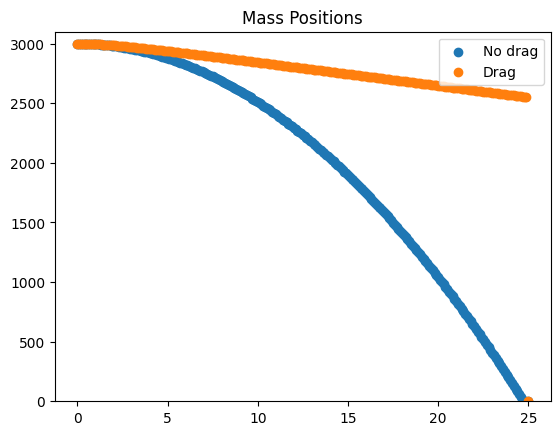

In [204]:
plt.scatter(ts_nodrag, ys_nodrag.T[0], label="No drag")
plt.scatter(ts_drag, ys_drag.T[0], label="Drag")
plt.ylim(0, 3100)
plt.title("Mass Positions")
plt.legend()
plt.show()

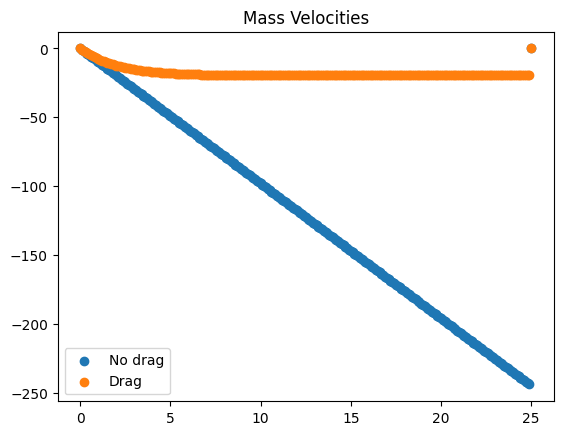

In [203]:
plt.scatter(ts_nodrag, ys_nodrag.T[1], label="No drag")
plt.scatter(ts_drag, ys_drag.T[1], label="Drag")
plt.title("Mass Velocities")
plt.legend()
plt.show()

Not entirely sure what the deal is with them going to zery at the very end, but I frankly cannot be bothered to sort that out.

So we see that in the case with drag, the mass reaches the ground significantly slower with air drag, as we expect. And the one with drag reaches a terminal velocity, while the one without drag has a clear linear trend on its velocity (as we would expect for a constant second derivative).

# Problem 9.

Substituting $\hbar = m = 1$ and $a = 0.5$ into the equations for our energies:
\begin{align*}
    E_n = \frac{\hbar^2n^2\pi^2}{8ma^2} = \frac{n^2\pi^2}{2}
\end{align*}
So the 6 eigenvalues we're looking for are:

In [210]:
for i in range(6):
    i = i+1 #start at n=1 not n=0
    print(f"n={i} :", i**2 * np.pi**2 / 2) 

n=1 : 4.934802200544679
n=2 : 19.739208802178716
n=3 : 44.41321980490211
n=4 : 78.95683520871486
n=5 : 123.37005501361698
n=6 : 177.65287921960845


So for this potential we have boundary conditions at $\pm a$ that are $\infty$, which numerically will probably be best as like 1e10 or somethin big. Startin with the Schr\"{o}die:
\begin{align*}
    \frac{-\hbar^2}{2m} \frac{d^2\psi}{dx^2} + V\psi &= E\psi \\
    \frac{d^2\psi}{dx^2} &= \frac{-2m(E - V)}{\hbar^2} \psi
\end{align*}

So, assuming $\hbar = m = 1$ and letting $V=0$ as it does in the region we're concerned about:
\begin{align*}
    \frac{d^2\psi}{dx^2} = -2E_n \psi
\end{align*}

As usual, system of 2 ODEs, letting $y = \psi$ and $z = \psi'$
\begin{align*}
    \begin{pmatrix}
        y' \\ z' 
    \end{pmatrix}
    &
    \begin{pmatrix}
        z \\ -2E_n
    \end{pmatrix}
\end{align*}

Cool, so we shoot starting at $x_i=-0.5$ and shoot towards $x_f = 0.5$. Shooting is a boundary value thing so we need $\psi(x_i)$ (which we have, its zero), $\psi(x_f)$ (which we have, its zero), AND the derivatives at both places, which we don't have.

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import brentq     # mr google told me this is like bisection but goated

a = 0.5 
x_i = -a
x_f = a

def schrodinger_ode(x, y, E):
    dpsi_dx = y[1]
    dpsi_prime_dx = -2 * E * y[0]
    return [dpsi_dx, dpsi_prime_dx]

def shoot(E):
    y0 = [0.0, 1.0] 
        
    sol = solve_ivp(
        schrodinger_ode, 
        [x_i, x_f], 
        y0, 
        args=(E,), 
        dense_output=False,
        rtol=1e-8,
        atol=1e-8
    )

    return sol.y[0, -1] 

def find_eigenvalues(N):
    eigenvalues = []
    
    # Iterate through the required eigenvalues (n=1 to N)
    for n in range(1, N + 1):
        E_analytical = (n**2 * np.pi**2) / 2
        
        E_low_guess = E_analytical * 0.9 
        E_high_guess = E_analytical * 1.1
        
        f_low = shoot(E_low_guess)
        f_high = shoot(E_high_guess)
        
        if f_low * f_high < 0:
            E_low_search = E_low_guess
            E_high_search = E_high_guess
            
        else:
            expected_sign_low = -1 if (n % 4 == 1 or n % 4 == 3) else 1  # use guessed sign to 
            
            E_test = E_low_guess
            while np.sign(shoot(E_test)) == expected_sign_low:
                E_test *= 0.99
                if E_test < 0:
                    raise Exception(f"Could not find lower bound for E_{n}. Energy cannot be negative.")
            E_low_search = E_test
            
            E_test = E_high_guess
            while np.sign(shoot(E_test)) != expected_sign_low:
                E_test *= 1.01
                if E_test > E_analytical * 2:
                    raise Exception(f"Could not find upper bound for E_{n}. Search range too wide.")
            E_high_search = E_test
        
        # brentq to find good roots
        E_numerical = brentq(shoot, E_low_search, E_high_search) 
        eigenvalues.append(E_numerical)
            
    return eigenvalues

E_numerical_list = find_eigenvalues(6)

print(E_numerical_list)

[4.934802187952245, 19.73920872920615, 44.413219601886254, 78.95683478926976, 123.37005433814686, 177.65287827289282]


Those look like the same numbers as the ones we were lookin for. Yay.

# Problem 10

Okay luckily this one seems kind of easy. With $m = 1$ and $k=10$, and $c$ left undetermined, we have:
\begin{align*}
    \ddot{x} + c\dot{x} + 10 = 0
\end{align*}
Doing our absolute most favoritest thing and splitting this into a system of two first order ODEs:
\begin{align*}
    \begin{pmatrix}
        y' \\ z' 
    \end{pmatrix}
    &=
    \begin{pmatrix}
        z \\ -10 - cz
    \end{pmatrix}
\end{align*}

In [225]:
from scipy.integrate import solve_ivp

def msd(t, x_derivs, c):
    x, v = x_derivs
    return np.array([v, -10 - c*v])

sol0 = solve_ivp(msd, [0,20], np.array([1, 0]), args = (0,))
sol1 = solve_ivp(msd, [0,20], np.array([1, 0]), args = (1,))
sol10 = solve_ivp(msd, [0,20], np.array([1, 0]), args = (10,))

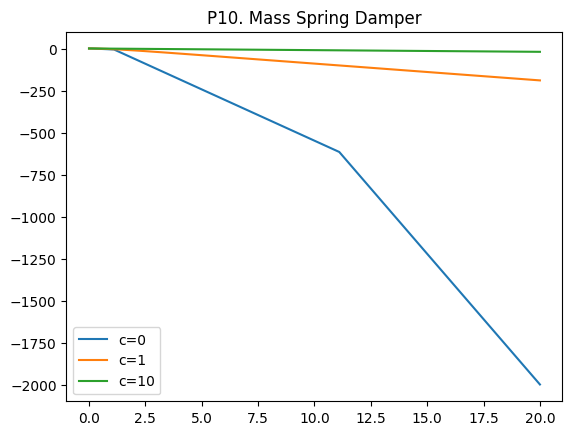

In [226]:
plt.plot(sol0.t, sol0.y[0], label="c=0")
plt.plot(sol1.t, sol1.y[0], label="c=1")
plt.plot(sol10.t, sol10.y[0], label="c=10")
plt.legend()
plt.title("P10. Mass Spring Damper")
plt.show()

So shocker, the undamped system goes the furthest. More damped = more less far. Woah!